## Build the Use Case
We will follow the Tensorflow Tutorial from here

In [27]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [28]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

### DNN Regression
It is now time to implements single-input and multiple-inputs DNN models

In [29]:
print('---------------------------------------------------------------------------------')
print('Initializing DNN program')
print('---------------------------------------------------------------------------------')
print('')
#---------------------------------------------------------------------
# Importing Libraries

print('---------------------------------------------------------------------------------')
print('Importing Libraries')
print('---------------------------------------------------------------------------------')
print('')

import time
import sklearn
import tensorflow as tf
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import math
#import keras
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
#from keras.callbacks import EarlyStopping
#from keras.preprocessing import sequence
#from keras.utils import pad_sequences
#from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
import shap
np.random.seed(0)

#---------------------------------------------------------------------
# Defining metric equations

print('---------------------------------------------------------------------------------')
print('Defining Metric Equations')
print('---------------------------------------------------------------------------------')
print('')

def ACC(TP,TN,FP,FN):
    Acc = (TP+TN)/(TP+FP+FN+TN)
    return Acc
def ACC_2 (TP, FN):
    ac = (TP/(TP+FN))
    return ac
def PRECISION(TP,FP):
    Precision = TP/(TP+FP)
    return Precision
def RECALL(TP,FN):
    Recall = TP/(TP+FN)
    return Recall
def F1(Recall, Precision):
    F1 = 2 * Recall * Precision / (Recall + Precision)
    return F1
def BACC(TP,TN,FP,FN):
    BACC =(TP/(TP+FN)+ TN/(TN+FP))*0.5
    return BACC
def MCC(TP,TN,FP,FN):
    MCC = (TN*TP-FN*FP)/(((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**.5)
    return MCC
def AUC_ROC(y_test_bin,y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    auc_avg = 0
    counting = 0
    for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
     # plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
      #print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))
      auc_avg += auc(fpr[i], tpr[i])
      counting = i+1
    return auc_avg/counting
#---------------------------------------------------------------------
# Defining features of interest
print('---------------------------------------------------------------------------------')
print('Defining features of interest')
print('---------------------------------------------------------------------------------')
print('')

# req_cols = [ ' Packet Length Std', ' Total Length of Bwd Packets', ' Subflow Bwd Bytes',
# ' Destination Port', ' Packet Length Variance', ' Bwd Packet Length Mean',' Avg Bwd Segment Size',
# 'Bwd Packet Length Max', ' Init_Win_bytes_backward','Total Length of Fwd Packets',
# ' Subflow Fwd Bytes', 'Init_Win_bytes_forward', ' Average Packet Size', ' Packet Length Mean',
# ' Max Packet Length',' Label']

# req_cols = [' Destination Port',' Flow Duration',' Total Fwd Packets',' Total Backward Packets','Total Length of Fwd Packets',' Total Length of Bwd Packets',' Fwd Packet Length Max',' Fwd Packet Length Min',' Fwd Packet Length Mean',' Fwd Packet Length Std','Bwd Packet Length Max',' Bwd Packet Length Min',' Bwd Packet Length Mean',' Bwd Packet Length Std','Flow Bytes/s',' Flow Packets/s',' Flow IAT Mean',' Flow IAT Std',' Flow IAT Max',' Flow IAT Min','Fwd IAT Total',' Fwd IAT Mean',' Fwd IAT Std',' Fwd IAT Max',' Fwd IAT Min','Bwd IAT Total',' Bwd IAT Mean',' Bwd IAT Std',' Bwd IAT Max',' Bwd IAT Min','Fwd PSH Flags',' Bwd PSH Flags',' Fwd URG Flags',' Bwd URG Flags',' Fwd Header Length',' Bwd Header Length','Fwd Packets/s',' Bwd Packets/s',' Min Packet Length',' Max Packet Length',' Packet Length Mean',' Packet Length Std',' Packet Length Variance','FIN Flag Count',' SYN Flag Count',' RST Flag Count',' PSH Flag Count',' ACK Flag Count',' URG Flag Count',' CWE Flag Count',' ECE Flag Count',' Down/Up Ratio',' Average Packet Size',' Avg Fwd Segment Size',' Avg Bwd Segment Size',' Fwd Header Length','Fwd Avg Bytes/Bulk',' Fwd Avg Packets/Bulk',' Fwd Avg Bulk Rate',' Bwd Avg Bytes/Bulk',' Bwd Avg Packets/Bulk','Bwd Avg Bulk Rate','Subflow Fwd Packets',' Subflow Fwd Bytes',' Subflow Bwd Packets',' Subflow Bwd Bytes','Init_Win_bytes_forward',' Init_Win_bytes_backward',' act_data_pkt_fwd',' min_seg_size_forward','Active Mean',' Active Std',' Active Max',' Active Min','Idle Mean',' Idle Std',' Idle Max',' Idle Min',' Label']

# req_cols = [' Down/Up Ratio', ' Fwd URG Flags', ' Flow IAT Std', 'Subflow Fwd Packets', ' Flow Packets/s', ' URG Flag Count', 'FIN Flag Count', ' Bwd Packets/s', 'Bwd Avg Bulk Rate', ' act_data_pkt_fwd', ' Fwd Packet Length Std', ' Bwd Avg Bytes/Bulk', ' Active Max', ' Flow IAT Max', ' min_seg_size_forward', ' Bwd Packet Length Std', ' Fwd IAT Std', ' Fwd Avg Bulk Rate', ' Fwd Packet Length Mean', ' Fwd Packet Length Max', ' Idle Std', ' CWE Flag Count', 'Fwd IAT Total', ' ACK Flag Count', ' Bwd URG Flags', ' Flow IAT Min', ' Flow IAT Mean', ' Total Backward Packets', ' Fwd Avg Packets/Bulk', 'Fwd Avg Bytes/Bulk', ' SYN Flag Count', ' Min Packet Length', ' Fwd Packet Length Min', 'Idle Mean', 'Fwd PSH Flags', ' Fwd IAT Min', ' Fwd Header Length', ' RST Flag Count', ' Idle Max', ' PSH Flag Count', ' Bwd Header Length', ' ECE Flag Count', ' Subflow Bwd Packets', 'Active Mean', 'Flow Bytes/s', ' Bwd IAT Mean', ' Avg Fwd Segment Size', ' Bwd Packet Length Min', ' Active Std', ' Bwd IAT Min', ' Flow Duration', 'Fwd Packets/s', ' Fwd IAT Max', 'Bwd IAT Total', ' Idle Min', ' Bwd PSH Flags', ' Bwd Avg Packets/Bulk', ' Total Fwd Packets', ' Active Min', ' Bwd IAT Std', ' Fwd IAT Mean', ' Bwd IAT Max', ' Label']

req_cols = [
    
    ' Packet Length Std', ' Total Length of Bwd Packets', ' Subflow Bwd Bytes',
    ' Destination Port', ' Packet Length Variance', ' Bwd Packet Length Mean',' Avg Bwd Segment Size',
    'Bwd Packet Length Max', ' Init_Win_bytes_backward','Total Length of Fwd Packets',
    ' Subflow Fwd Bytes', 'Init_Win_bytes_forward', ' Average Packet Size', ' Packet Length Mean',
    ' Max Packet Length',
    
    ' Down/Up Ratio', ' Fwd URG Flags', ' Flow IAT Std', 'Subflow Fwd Packets', ' Flow Packets/s', ' URG Flag Count', 'FIN Flag Count', ' Bwd Packets/s', 'Bwd Avg Bulk Rate'
    
    # , ' act_data_pkt_fwd', ' Fwd Packet Length Std', ' Bwd Avg Bytes/Bulk', ' Active Max', ' Flow IAT Max', ' min_seg_size_forward', ' Bwd Packet Length Std', ' Fwd IAT Std', ' Fwd Avg Bulk Rate', ' Fwd Packet Length Mean', ' Fwd Packet Length Max', ' Idle Std', ' CWE Flag Count', 'Fwd IAT Total'
    
    # , ' ACK Flag Count', ' Bwd URG Flags', ' Flow IAT Min', ' Flow IAT Mean', ' Total Backward Packets', ' Fwd Avg Packets/Bulk', 'Fwd Avg Bytes/Bulk', ' SYN Flag Count', ' Min Packet Length', ' Fwd Packet Length Min', 'Idle Mean', 'Fwd PSH Flags', ' Fwd IAT Min'
     
    #   ' Fwd Header Length', ' RST Flag Count', ' Idle Max', ' PSH Flag Count', ' Bwd Header Length', ' ECE Flag Count', ' Subflow Bwd Packets', 'Active Mean', 'Flow Bytes/s', ' Bwd IAT Mean', ' Avg Fwd Segment Size', ' Bwd Packet Length Min', ' Active Std', ' Bwd IAT Min', ' Flow Duration', 'Fwd Packets/s', ' Fwd IAT Max', 'Bwd IAT Total', ' Idle Min', ' Bwd PSH Flags', ' Bwd Avg Packets/Bulk', ' Total Fwd Packets', ' Active Min', ' Bwd IAT Std', ' Fwd IAT Mean', ' Bwd IAT Max'
            
            , ' Label']

# req_cols = [' Destination Port',' Flow Duration',' Total Fwd Packets',' Total Backward Packets','Total Length of Fwd Packets',' Total Length of Bwd Packets',' Label']
#---------------------------------------------------------------------
#Load Databases from csv file
print('---------------------------------------------------------------------------------')
print('Loading Databases')
print('---------------------------------------------------------------------------------')
print('')


df0 = pd.read_csv ('cicids_db/Wednesday-workingHours.pcap_ISCX.csv', usecols=req_cols)

df1 = pd.read_csv ('cicids_db/Tuesday-WorkingHours.pcap_ISCX.csv', usecols=req_cols)

df2 = pd.read_csv ('cicids_db/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv', usecols=req_cols)

df3 = pd.read_csv ('cicids_db/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv', usecols=req_cols)

df4 = pd.read_csv ('cicids_db/Monday-WorkingHours.pcap_ISCX.csv', usecols=req_cols)

df5 = pd.read_csv ('cicids_db/Friday-WorkingHours-Morning.pcap_ISCX.csv', usecols=req_cols)

df6 = pd.read_csv ('cicids_db/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv', usecols=req_cols)

df7 = pd.read_csv ('cicids_db/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv', usecols=req_cols)


frames = [df0, df1, df2, df3, df4, df5, df6, df7]

df = pd.concat(frames,ignore_index=True)

df = df.sample(frac = 0.05)
#---------------------------------------------------------------------
# Normalize database
print('---------------------------------------------------------------------------------')
print('Normalizing database')
print('---------------------------------------------------------------------------------')
print('')

df_max_scaled = df.copy()

y = df_max_scaled[' Label'].replace({'DDoS' :'Dos/Ddos' ,'DoS GoldenEye': 'Dos/Ddos', 'DoS Hulk': 'Dos/Ddos', 'DoS Slowhttptest': 'Dos/Ddos', 'DoS slowloris': 'Dos/Ddos', 'Heartbleed': 'Dos/Ddos','FTP-Patator': 'Brute Force', 'SSH-Patator': 'Brute Force','Web Attack - Brute Force': 'Web Attack', 'Web Attack - Sql Injection': 'Web Attack', 'Web Attack - XSS': 'Web Attack'})

df_max_scaled.pop(' Label')


df_max_scaled
for col in df_max_scaled.columns:
    t = abs(df_max_scaled[col].max())
    df_max_scaled[col] = df_max_scaled[col]/t
df_max_scaled
df = df_max_scaled.assign( Label = y)
#df
df = df.fillna(0)

#---------------------------------------------------------------------

# Separate features and labels 
print('---------------------------------------------------------------------------------')
print('Separating features and labels')
print('---------------------------------------------------------------------------------')
print('')

y = df.pop('Label')
X = df
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
print('---------------------------------------------------------------------------------')
result_list = [counter['None'],counter['Denial of Service'], counter['Port Scanning']]
print('number of Labels  ',result_list)
print('---------------------------------------------------------------------------------')

df = X.assign( Label = y)

y, label = pd.factorize(y)
# y_test, label = pd.factorize(test['Label'])
#---------------------------------------------------------------------

# Separate Training and Testing db
print('---------------------------------------------------------------------------------')
print('Separating Training and Testing db')
print('---------------------------------------------------------------------------------')
print('')

X_train,X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.7,random_state=42)
df = X.assign( Label = y)




---------------------------------------------------------------------------------
Initializing DNN program
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Importing Libraries
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Defining Metric Equations
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Defining features of interest
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
Loading Databases
---------------------------------------------------------------------------------

--------------------------------------------------------

In [30]:
# X_train.columns

In [31]:
#---------------------------------------------------------------------
# Defining the DNN model

print('---------------------------------------------------------------------------------')
print('Defining the DNN model')
print('---------------------------------------------------------------------------------')
print('')

dropout_rate = 0.01
nodes = 5

model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(len(X_train.columns,))))



model.add(tf.keras.layers.Dense(nodes, activation='relu'))
model.add(tf.keras.layers.Dense(2*nodes, activation='relu'))
model.add(tf.keras.layers.Dense(nodes, activation='tanh'))
model.add(tf.keras.layers.Dense(2*nodes, activation='relu'))
model.add(tf.keras.layers.Dense(nodes, activation='relu'))


model.add(tf.keras.layers.Dense(nodes, activation='relu'))
model.add(tf.keras.layers.Dense(2*nodes, activation='relu'))
model.add(tf.keras.layers.Dense(nodes, activation='tanh'))
model.add(tf.keras.layers.Dense(2*nodes, activation='relu'))
model.add(tf.keras.layers.Dense(nodes, activation='relu'))




# model.add(tf.keras.layers.Dense(64, activation='relu'))
# model.add(tf.keras.layers.Dense(32, activation='relu'))
# model.add(tf.keras.layers.Dense(64, activation='tanh'))
# model.add(tf.keras.layers.Dense(32, activation='sigmoid'))

model.add(tf.keras.layers.Dense(7))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.1)
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()
#---------------------------------------------------------------------

#Training Model

---------------------------------------------------------------------------------
Defining the DNN model
---------------------------------------------------------------------------------

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 5)                 125       
_________________________________________________________________
dense_12 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_14 (Dense)             (None, 10)                60        
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 55        
________________________________________________________________

In [32]:
from tensorflow.keras.models import load_model

from tensorflow.keras.callbacks import EarlyStopping

print('---------------------------------------------------------------------------------')
print('Training the model')
print('---------------------------------------------------------------------------------')
print('')


#print(train[features])
#print(y_train)
#START TIMER MODEL
start = time.time()

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='accuracy', patience=5, restore_best_weights=True)

# Modify model.fit to include the EarlyStopping callback
model.fit(X_train, y_train, epochs=100, batch_size=512, callbacks=[early_stopping])

# model.save("DNN_CIC_1.h5")

# model = load_model("DNN_CIC_1.h5")


end = time.time()
print('---------------------------------------------------------------------------------')
print('ELAPSE TIME TRAINING MODEL: ',(end - start)/60, 'min')
print('---------------------------------------------------------------------------------')
print('')
#---------------------------------------------------------------------
# loss_per_epoch = model.history.history['loss']
#print(plt.plot(range(len(loss_per_epoch)),loss_per_epoch))

#---------------------------------------------------------------------



---------------------------------------------------------------------------------
Training the model
---------------------------------------------------------------------------------

Epoch 1/100
194/194 [==============================] - 1s 3ms/step - loss: 1.9731 - accuracy: 0.7405
Epoch 2/100
194/194 [==============================] - 1s 3ms/step - loss: 1.8946 - accuracy: 0.8684
Epoch 3/100
194/194 [==============================] - 1s 3ms/step - loss: 1.8672 - accuracy: 0.8617
Epoch 4/100
194/194 [==============================] - 1s 3ms/step - loss: 1.8480 - accuracy: 0.8814
Epoch 5/100
194/194 [==============================] - 1s 3ms/step - loss: 1.8605 - accuracy: 0.8830
Epoch 6/100
194/194 [==============================] - 1s 3ms/step - loss: 1.8259 - accuracy: 0.8787
Epoch 7/100
194/194 [==============================] - 1s 3ms/step - loss: 1.8248 - accuracy: 0.8769
Epoch 8/100
194/194 [==============================] - 1s 3ms/step - loss: 1.8163 - accuracy: 0.8775
Epoch 9/

In [33]:

print('---------------------------------------------------------------------------------')
print('Model Prediction')
print('---------------------------------------------------------------------------------')
print('')
print('---------------------------------------------------------------------------------')
start = time.time()
y_pred = model.predict(X_test)
end = time.time()
print('ELAPSE TIME MODEL PREDICTION: ',(end - start)/60, 'min')
print('---------------------------------------------------------------------------------')
print('')

#print(y_pred)
ynew = np.argmax(y_pred,axis = 1)
#print(ynew)
score = model.evaluate(X_test, y_test,verbose=1)
#print(score)
pred_label = label[ynew]
#print(score)

#---------------------------------------------------------------------
# pd.crosstab(test['ALERT'], preds, rownames=['Actual ALERT'], colnames = ['Predicted ALERT'])

---------------------------------------------------------------------------------
Model Prediction
---------------------------------------------------------------------------------

---------------------------------------------------------------------------------
ELAPSE TIME MODEL PREDICTION:  0.021580620606740316 min
---------------------------------------------------------------------------------

1327/1327 [==============================] - 2s 1ms/step - loss: 2.0093 - accuracy: 0.8756


In [34]:
# y_test

In [35]:
# ynew

In [36]:
from sklearn.metrics import accuracy_score

accuracy =accuracy_score(y_test, ynew)*100
print(accuracy)

87.56064245678489


In [37]:
dnn_model = model

In [38]:
%%time
train_features = X_train#train[features]
train_labels = y_train
# history = model.fit(
# #history = dnn_model.fit(
#     train_features, train_labels,
#     validation_split=0.2,
#     verbose=0, epochs=50)

history = model

CPU times: user 561 µs, sys: 115 µs, total: 676 µs
Wall time: 697 µs


### Make predictions


In [39]:

test_features = X_test
test_labels = y_test
#test_predictions = y_pred

In [40]:
vec = []
for i in range (len(test_labels)):
    for j in range(7):
        vec.append(test_labels[i])


test_labels = vec  

In [53]:
test_labels

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,


## Explain a Regression model (with Xplique)

We now have at our disposal a model trained for a regression task and we would like to use the Xplique library in order to have some highlights towards it. First, let's load this model and import the xplique library.

In [41]:
from xplique.attributions import (
                            Saliency,
                             IntegratedGradients,
                             KernelShap,
                             Lime,
                             Occlusion,
                             SmoothGrad,
                             VarGrad,
                             SquareGrad,
                             GuidedBackprop,
                             DeconvNet,
                             GradientInput
)

In [42]:
inputs_tf, targets_tf = tf.cast(test_features, tf.float32), tf.cast(test_labels, tf.float32)
targets_tf = tf.expand_dims(targets_tf, axis=-1)
# new_targets_tf = tf.ones((566149  ,1))
# new_targets_tf = tf.ones((5662    ,1))
283075 
new_targets_tf = tf.ones((int(inputs_tf.shape[0])     ,1))


In [43]:
methods_params = [
    ("Saliency", Saliency, {}),
    ("Integrated Gradients", IntegratedGradients, {}),
    # ("KernelShap", KernelShap, {}),
    ("Lime", Lime, {}),
    ("Occlusion", Occlusion, {"patch_size": 1, "patch_stride": 1}),
    ("SmoothGrad", SmoothGrad, {}),
    ("VarGrad", VarGrad, {}),
    ("SquareGrad", SquareGrad, {}),
    ("GuidedBackprop", GuidedBackprop, {}),
    ("DeconvNet", DeconvNet, {}),
    ("GradientInput", GradientInput, {})
]

In [44]:
# get the different explanations
explanations = []

for name, Cls, params in methods_params:

    explainer   = Cls(dnn_model, **params)
    explanation = explainer(inputs_tf, new_targets_tf)
    explanations.append((name, explanation))

Now we will have a look at our results

In [45]:
# features_name = [ ' Packet Length Std', ' Total Length of Bwd Packets', ' Subflow Bwd Bytes',
# ' Destination Port', ' Packet Length Variance', ' Bwd Packet Length Mean',' Avg Bwd Segment Size',
# 'Bwd Packet Length Max', ' Init_Win_bytes_backward','Total Length of Fwd Packets',
# ' Subflow Fwd Bytes', 'Init_Win_bytes_forward', ' Average Packet Size', ' Packet Length Mean',
# ' Max Packet Length']

features_name = X_train.columns

In [46]:
from xplique.plots import plot_feature_impact, plot_mean_feature_impact, summary_plot_tabular

In [47]:
test_features2 = test_features.values


### The mean impact for every sample

In [48]:
# methods_params

In [49]:
# enumerate(explanations)
# explanations[1]

In [50]:

def _select_features(explanations, max_display, features_name):
    """
    Helper, that select max_display features. Useful if the number of features is huge.
    We keep the features which have a mean absolute impact greater than the others.
    """
    # if we have a lot of feature we will keep only max display
    if max_display is None:
        num_features_kept = len(features_name)
        features_idx_kept = np.arange(num_features_kept)
    else:
        num_features_kept = min(max_display, len(features_name))
        single_explanation = len(explanations.shape)==1
        if single_explanation:
            ranked = np.argsort(
               np.abs(explanations)
            )
        else:
            ranked = np.argsort(
                np.mean(np.abs(explanations), axis=0)
            )
        features_idx_kept = ranked[::-1][:num_features_kept]
    return num_features_kept, features_idx_kept

def _sanitize_features_name(explanations, features_name):
    """
    Helper that provide generic features name (with the feature index) if features name
    is None.
    """
    if features_name is None:
        single_explanation = len(explanations.shape)==1
        if single_explanation:
            features_name = [f"Feature {str(j)}" for j in range(len(explanations))]
        else:
            features_name = [f"Feature {str(j)}" for j in range(explanations.shape[1])]
    return features_name
def mean_feature_impact(
    explanations,
    features_name=None,
    max_display=None,
):
    """
    The same than plot_feature_importance but we will consider the mean explanation value
    grouped by feature.
    A more informative plot is the summary_plot_tabular.
    """
    # sanitize explanations to numpy array
    explanations = np.array(explanations)

    mean_explanation = np.mean(explanations, axis=0)

    explanation = explanations
    features_value=None

    # plot_feature_impact(
    #     mean_explanation_per_feature,
    #     features_name=features_name,
    #     max_display=max_display
    # )

    # sanitize to numpy array
    explanation = np.array(explanation)

    # add default features name if not provided
    features_name = _sanitize_features_name(explanation, features_name)

    # if we have a lot of feature we will keep only max display
    num_features_kept, features_idx_kept = _select_features(explanation, max_display, features_name)
    explanation_kept = explanation[features_idx_kept]

    # build y-ticks label
    yticklabels = []
    for idx_kept in features_idx_kept:
        if features_value is None:
            yticklabels.append(features_name[idx_kept])
        else:
            yticklabels.append(
                f"{str(round(features_value[idx_kept], 3))} = {features_name[idx_kept]}"
            )

    y_pos = np.arange(num_features_kept)  # the label locations

    return mean_explanation, y_pos, yticklabels


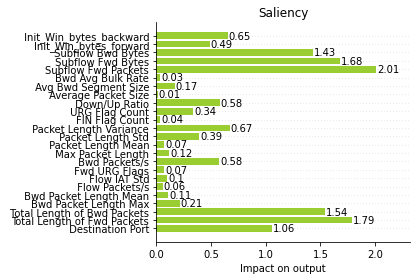

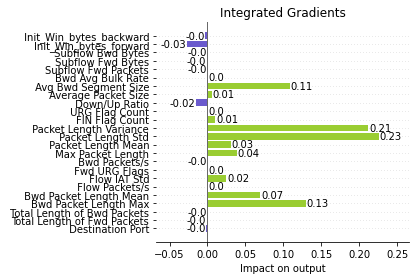

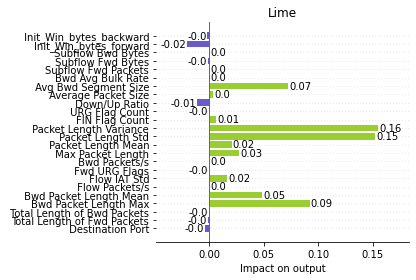

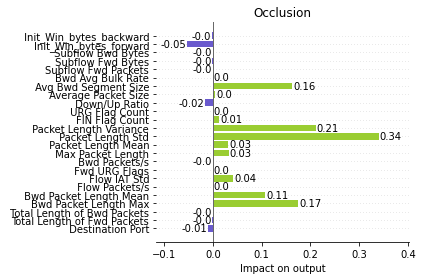

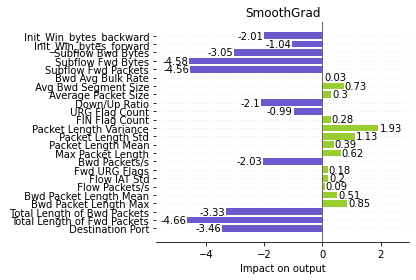

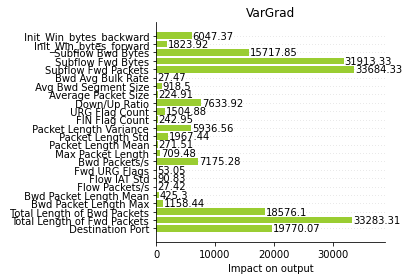

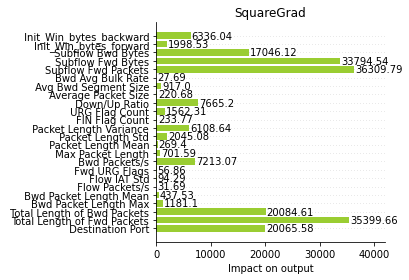

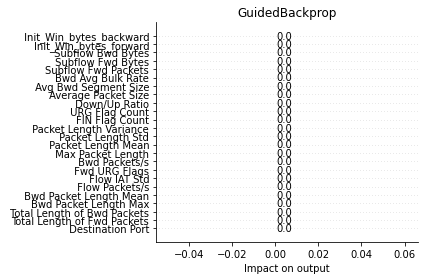

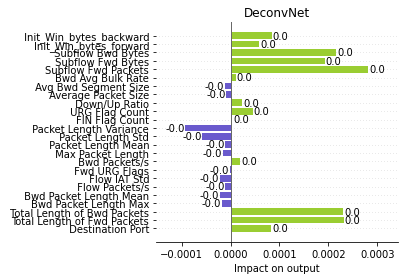

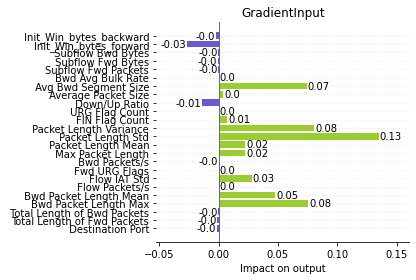

In [51]:
u = []
m = []
for exp_index, (exp_method, exp) in enumerate(explanations):
    # print(exp, features_name)
    u.append(mean_feature_impact(exp, features_name))
    m.append(exp_method)
    plot_mean_feature_impact(exp, features_name)
    # print(y_pos)
    plt.title(exp_method)
    plt.show()


In [52]:

output_file_name = "xplique_CIC_test.txt"
with open(output_file_name, "w") as f: print('---------------------------------------------------------------------------------', file = f)
with open(output_file_name, "a") as f:print("CICIDS - XPLIQUE", file = f)

for j in range(0,len(m)):
    print(m[j])
    with open(output_file_name, "a") as f:print(m[j], file = f)

    # for i in range(0, len(u[0][1])):
    # # print('explainer',)
    #     print("{:<10} {:<30} {} ".format(u[j][1][i],u[j][2][i], u[j][0][i],))
    # print('')
    for i in sorted(range(len(u[j][0])), key=lambda k: abs(u[j][0][k]), reverse=True):
        print("{:<10} {:<30} {} ".format(u[j][1][i], u[j][2][i], u[j][0][i]))
        with open(output_file_name, "a") as f:print("{:<10} {:<30} {} ".format(u[j][1][i], u[j][2][i], u[j][0][i]), file = f)

        # print('')
        # with open(output_file_name, "a") as f:print('', file = f)

    print('')
    with open(output_file_name, "a") as f:print('', file = f)

    



Saliency
19         Subflow Fwd Packets            2.0052380561828613 
1          Total Length of Fwd Packets    1.7867485284805298 
20          Subflow Fwd Bytes             1.6765586137771606 
2           Total Length of Bwd Packets   1.5412065982818604 
21          Subflow Bwd Bytes             1.4341676235198975 
0           Destination Port              1.0580283403396606 
12          Packet Length Variance        0.6699227690696716 
23          Init_Win_bytes_backward       0.6517496705055237 
15          Down/Up Ratio                 0.57880038022995 
8           Bwd Packets/s                 0.5776602625846863 
22         Init_Win_bytes_forward         0.4874625504016876 
11          Packet Length Std             0.3942960798740387 
14          URG Flag Count                0.3379211127758026 
3          Bwd Packet Length Max          0.2147866189479828 
17          Avg Bwd Segment Size          0.17057211697101593 
9           Max Packet Length             0.12122730165719986 